# <font color=green> Vingetting file generation for SIXTE XMM-Newton XML file </font>
***
## EPIC-pn

1. on-axis, full frame, thin filter


In [33]:
from pysas.wrapper import Wrapper as w
import os.path
from os import path
import numpy as np
from astropy.io import fits
from astropy.table import Table
from js9helper import *
import jpyjs9
import matplotlib.pyplot as plt
from scipy.stats import binned_statistic

In [4]:
home = os.path.expanduser('~')

In [5]:
wdir=f'{home}/my_workspace/sixte/odf_data'
arfdir=f'{home}/my_workspace/sixte/arf'
#os.mkdir(wdir) 
os.chdir(wdir)

In [6]:
os.environ['SAS_CCFPATH'] = f'{home}/data/pub'

In [7]:
inargs = []
t = w('sasver', inargs)
t.run()


    XMM-Newton SAS - release and build information

    SAS release: 22.1.0-a8f2c2afa-20250304-22.1.0
    Compiled on: Tue Mar  4 07:29:35 UTC 2025
    Compiled by: sasbuild@8b74f8fb7fa2
    Platform   : Ubuntu22.04

    SAS-related environment variables set:

    
SAS_DIR        = /usr/local/SAS/xmmsas_22.1.0-a8f2c2afa-20250304/
SAS_PATH       = /usr/local/SAS/xmmsas_22.1.0-a8f2c2afa-20250304/
SAS_CCFPATH    = /home/egulbaha/data/pub


In [8]:
inargs = [f'sas_ccf={wdir}/ccf.cif', f'sas_odf={wdir}/0048_0095010901_SCX00000SUM.SAS', f'workdir={wdir}']

w('startsas', inargs).run()

startsas - WARNING - Executing /usr/local/SAS/xmmsas_22.1.0-a8f2c2afa-20250304/lib/python/pysas/startsas/startsas.py {'odfid': '', 'workdir': '/home/egulbaha/my_workspace/sixte/odf_data', 'sasfiles': 'yes', 'sas_ccf': '/home/egulbaha/my_workspace/sixte/odf_data/ccf.cif', 'sas_odf': '/home/egulbaha/my_workspace/sixte/odf_data/0048_0095010901_SCX00000SUM.SAS', 'level': 'ODF', 'cifbuild_opts': '', 'odfingest_opts': ''}
INFO:startsas:LHEASOFT = /usr/local/heasoft-6.33.2/x86_64-pc-linux-gnu-libc2.35
INFO:startsas:SAS_DIR = /usr/local/SAS/xmmsas_22.1.0-a8f2c2afa-20250304/
INFO:startsas:SAS_CCFPATH = /home/egulbaha/data/pub
INFO:startsas:startsas was initiated from /media/user/sixte/odf_data
INFO:startsas:Work directory = /home/egulbaha/my_workspace/sixte/odf_data
INFO:startsas:Changed directory to /home/egulbaha/my_workspace/sixte/odf_data
INFO:startsas:Will download ODF with level ODF
INFO:startsas:/home/egulbaha/my_workspace/sixte/odf_data/ccf.cif is present
INFO:startsas:/home/egulbaha/my



        Starting SAS session
    
        Working directory = /home/egulbaha/my_workspace/sixte/odf_data
    
        
SAS_CCF = /home/egulbaha/my_workspace/sixte/odf_data/ccf.cif
SAS_ODF = /home/egulbaha/my_workspace/sixte/odf_data/0048_0095010901_SCX00000SUM.SAS


In [9]:
eventfile = wdir+'/0048_0095010901_EPN_S001_ImagingEvts.ds'

In [28]:
# SAS Command
cmd        = "evselect" # SAS task to be executed                  

# Arguments of SAS Command

image=wdir+'/image.fits'

inargs     = [f'table={eventfile}','imagebinning=binSize',f'imageset={image}', 'withimageset=yes' ,'xcolumn=X', 'ycolumn=Y', 'ximagebinsize=80', 'yimagebinsize=80']

print("   Filter expression to use: "+expression+" \n")
print("   SAS command to be executed: "+cmd+", with arguments; \n")
inargs

   Filter expression to use: (PATTERN<= 4)&&(PI in [300:10000]) && #XMMEA_EP 

   SAS command to be executed: evselect, with arguments; 



['table=/home/egulbaha/my_workspace/sixte/odf_data/0048_0095010901_EPN_S001_ImagingEvts.ds',
 'imagebinning=binSize',
 'imageset=/home/egulbaha/my_workspace/sixte/odf_data/image.fits',
 'withimageset=yes',
 'xcolumn=X',
 'ycolumn=Y',
 'ximagebinsize=80',
 'yimagebinsize=80']

In [29]:
w(cmd, inargs).run()

Executing: 
evselect table='/home/egulbaha/my_workspace/sixte/odf_data/0048_0095010901_EPN_S001_ImagingEvts.ds' keepfilteroutput='no' withfilteredset='no' filteredset='filtered.fits' destruct='yes' flagcolumn='EVFLAG' flagbit='-1' filtertype='expression' dssblock='' expression='true' writedss='yes' cleandss='no' updateexposure='yes' filterexposure='yes' blockstocopy='' attributestocopy='' energycolumn='PHA' withzcolumn='no' zcolumn='WEIGHT' withzerrorcolumn='no' zerrorcolumn='EWEIGHT' ignorelegallimits='no' withimageset='yes' imageset='/home/egulbaha/my_workspace/sixte/odf_data/image.fits' xcolumn='X' ycolumn='Y' imagebinning='binSize' ximagebinsize='80' yimagebinsize='80' squarepixels='no' ximagesize='600' yimagesize='600' withxranges='no' ximagemin='1' ximagemax='640' withyranges='no' yimagemin='1' yimagemax='640' withimagedatatype='no' imagedatatype='Real64' withcelestialcenter='no' raimagecenter='0' decimagecenter='0' withspectrumset='no' spectrumset='spectrum.fits' spectralbinsize

In [30]:
output = wdir+'/expmap.fits' 
attitutefile = wdir+'/0048_0095010901_AttHk.ds'

In [31]:
inargs = [f'imageset={image}', f'attitudeset={attitutefile}', f'eventset={eventfile}', f'expimageset={output}']

In [32]:
w('eexpmap', inargs).run()

Executing: 
eexpmap imageset='/home/egulbaha/my_workspace/sixte/odf_data/image.fits' attitudeset='/home/egulbaha/my_workspace/sixte/odf_data/0048_0095010901_AttHk.ds' eventset='/home/egulbaha/my_workspace/sixte/odf_data/0048_0095010901_EPN_S001_ImagingEvts.ds' expimageset='/home/egulbaha/my_workspace/sixte/odf_data/expmap.fits' withdetcoords='no' withvignetting='yes' usefastpixelization='no' usedlimap='no' attrebin='4' pimin='2000' pimax='4500' 
eexpmap:- Executing (routine): eexpmap imageset=/home/egulbaha/my_workspace/sixte/odf_data/image.fits attitudeset=/home/egulbaha/my_workspace/sixte/odf_data/0048_0095010901_AttHk.ds eventset=/home/egulbaha/my_workspace/sixte/odf_data/0048_0095010901_EPN_S001_ImagingEvts.ds expimageset=/home/egulbaha/my_workspace/sixte/odf_data/expmap.fits withdetcoords=no withvignetting=yes usefastpixelization=no usedlimap=no attrebin=4 pimin=2000 pimax=4500  -w 1 -V 4
eexpmap:- eexpmap (eexpmap-4.13)  [22.1.0-a8f2c2afa-20250304] started:  2025-05-19T13:39:36.0

In [35]:
# Load the exposure map
expmap_file = output
with fits.open(expmap_file) as hdul:
    exp_data = hdul[0].data
    header = hdul[0].header

# Assume center of the map is on-axis
ny, nx = exp_data.shape
yc, xc = ny // 2, nx // 2

# Create radius map (in pixels)
y, x = np.indices((ny, nx))
r_pix = np.sqrt((x - xc)**2 + (y - yc)**2)

# Convert to arcmin using pixel scale from header (approx 4.1 arcsec/pixel)
pix_scale_arcmin = 4.1 / 60  # arcmin per pixel
r_arcmin = r_pix * pix_scale_arcmin

# Mask invalid pixels (zero exposure or NaN)
valid_mask = (exp_data > 0) & np.isfinite(exp_data)

# Bin exposure data as function of radius
r_bins = np.arange(0, r_arcmin.max(), 0.5)  # 0.5 arcmin bins
bin_means, _, _ = binned_statistic(
    r_arcmin[valid_mask], exp_data[valid_mask], statistic='mean', bins=r_bins
)

# Normalize by central (on-axis) exposure
vignetting_profile = bin_means / bin_means[0]
r_bin_centers = 0.5 * (r_bins[:-1] + r_bins[1:])

# Define multiple energies (approximation: reuse same profile for demo)
energies = [0.5, 1.0, 2.0, 5.0, 10.0]  # in keV
energy_col = []
theta_col = []
vignette_col = []

for E in energies:
    energy_col.extend([E] * len(r_bin_centers))
    theta_col.extend(r_bin_centers)
    vignette_col.extend(vignetting_profile)

# vignetting FITS table
table = Table([
    np.array(energy_col, dtype=np.float32),
    np.array(theta_col, dtype=np.float32),
    np.array(vignette_col, dtype=np.float32)
], names=('ENERGY_KEV', 'THETA_ARCMIN', 'VIGNETTING'))

# Write to FITS
table_hdu = fits.BinTableHDU(table, name="VIGNETTING")
primary_hdu = fits.PrimaryHDU()
hdul = fits.HDUList([primary_hdu, table_hdu])
hdul.writeto("xmm_vignetting_multiE.fits", overwrite=True)
print("Saved multi-energy vignetting table as xmm_vignetting_multiE.fits")

Saved multi-energy vignetting table as xmm_vignetting_multiE.fits


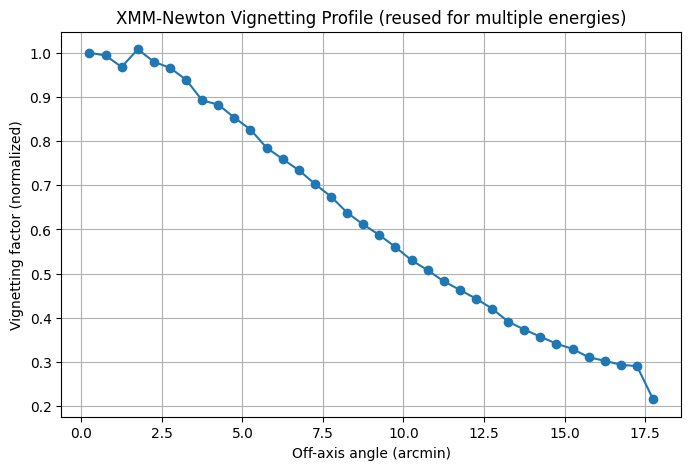

In [36]:
# plot for one energy
plt.figure(figsize=(8,5))
plt.plot(r_bin_centers, vignetting_profile, marker='o')
plt.xlabel("Off-axis angle (arcmin)")
plt.ylabel("Vignetting factor (normalized)")
plt.title("XMM-Newton Vignetting Profile (reused for multiple energies)")
plt.grid(True)
plt.show()